# Gyro experiments
setup

In [118]:
import random, heapq, rpyc
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from IPython import display
from mpl_toolkits.mplot3d import Axes3D
import time



conn = rpyc.classic.connect("ev3dev.local") # host name or IP address of the EV3
ev3 = conn.modules['ev3dev2']      # import ev3dev2.ev3 remotely

legosensors=conn.modules['ev3dev2.sensor.lego']
sensor_controls=conn.modules['ev3dev2.sensor']
sound=conn.modules['ev3dev2.sound']
led_controls=conn.modules['ev3dev2.led']
motor=conn.modules['ev3dev2.motor']

led=led_controls.Leds()
sound=sound.Sound()

In [119]:
m  = motor.LargeMotor("outA")


In [122]:
out2 = sensor_controls.INPUT_2
out3 = sensor_controls.INPUT_3
out4 = sensor_controls.INPUT_4

gyrotop       = legosensors.GyroSensor(out4)
gyromid       = legosensors.GyroSensor(out2)
gyrobot       = legosensors.GyroSensor(out3)

In [127]:
rates=[]
gyrotop.mode  ="GYRO-ANG"
gyromid.mode  ="GYRO-ANG"
gyrobot.mode  ="GYRO-ANG"

while True:
    m.on_for_degrees(20,50)
    m.on_for_degrees(-20,50)
    display.clear_output(wait=True)
    trate=gyrotop.rate
    mrate=gyromid.rate
    brate=gyrobot.rate
    
    display.display(np.sign(trate)*trate,np.sign(mrate)*mrate,np.sign(brate)*brate)
    rates.append([np.sign(trate)*trate,np.sign(mrate)*mrate,np.sign(brate)*brate])


KeyboardInterrupt: 

In [73]:
timelist_with=[]
timelist_without=[]
for i in range(100):
    start=time.clock()
    mboth.on_for_degrees(-20,-20,50)
    mboth.on_for_degrees(20,20,50)
    brate=gyroback.rate
    timelist_with.append(time.clock()-start)

for i in range(100):
    start=time.clock()
    mboth.on_for_degrees(-20,-20,50)
    mboth.on_for_degrees(20,20,50)
    timelist_without.append(time.clock()-start)

    


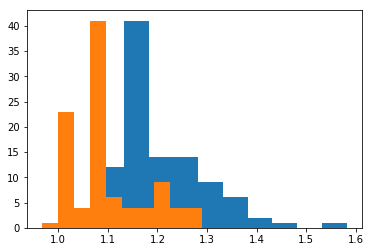

In [74]:
plt.hist(timelist_with)
plt.hist(timelist_without)
plt.show()

In [75]:
sum(timelist_with)/len(timelist_with)-sum(timelist_without)/len(timelist_without)

0.11054132617907686

In [116]:
rates=[]
gyroleg.mode  ="GYRO-RATE"
gyrotop.mode  ="GYRO-RATE"
gyroback.mode ="GYRO-RATE"

for i in range(100):
    mboth.on_for_degrees(-20,-20,80)
    mboth.on_for_degrees(20,20,80)

    display.clear_output(wait=True)
    lrate=gyroleg.rate
    brate=gyroback.rate
    trate=gyrotop.rate
    display.display(np.sign(lrate)*lrate,np.sign(brate)*brate,np.sign(trate)*trate)
    
    rates.append([np.sign(lrate)*lrate,np.sign(brate)*brate,np.sign(trate)*trate])
    

0

8

14